# (Ford Gobike Data Exploration)
## by (Shaikha Bin Ateeq)

## Preliminary Wrangling

> This document investigates a dataset including about 183,412 trips from a Ford Gobike.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

**load the Data and Data Assessment**

In [7]:
# load in the dataset into a pandas data 
data = pd.read_csv('/content/Ford-Gobike-Data-Exploration.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
# overview of data shape and data types
print(data.shape)
print(data.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [9]:
# the descriptive statistics of the data
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
# Check  duplicates 
print(data.duplicated().sum())

0


In [11]:
# Check  nulls 
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
#create copy of original dataframe
df = data.copy()

In [13]:
# Remove rows which not have gender
df = df[df['member_gender'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [14]:
# Remove rows which not have start_station_id
df = df[df['start_station_id'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [15]:
# Check  nulls 
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [16]:
# Change start_time and end_time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [17]:
# change  bike_share_for_all_trip  data type to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [18]:
#Add additional columns for trip duration in minutes, trip start date in yyyy-mm-dd format, 
#trip start hour, day, week, and month.
#calculating riders' age from 2019-'member_birth_year'= age 

df['duration_in_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')
df['member_age'] = 2019 - df['member_birth_year']


df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_in_minute,start_date,start_hour_of_day,start_day_of_week,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,869.750000,2019-02-28,17,Thursday,February,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,1030.900000,2019-02-28,12,Thursday,February,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,608.166667,2019-02-28,17,Thursday,February,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,26.416667,2019-02-28,23,Thursday,February,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,29.883333,2019-02-28,23,Thursday,February,60.0


In [19]:
df.shape

(174952, 22)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> The dataset contains 174952 fordgobike rides with 16 characteristics. 
(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).
There are 9 numerical specifications, 2 datetime specifications, 4 object type specifications, and 1 boolean type specification out of 16 total.


### What is/are the main feature(s) of interest in your dataset?

> I'm particularly interested in determining how other dataset characteristics such as age, start and finish station, user type, and gender effect the  trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start date/time and duration information for each trip will aid in determining how longer of the trip. The member information, such as user type and gender, will assist us in determining who the key focus customer groups are; additionally, the member birth year will assist us in determining the age of the rider; also the houre day ,month,year will help us also  and finally, we will use the different groups to summarize bike usage data to see if there is any particular pattern associated with a particular group of riders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

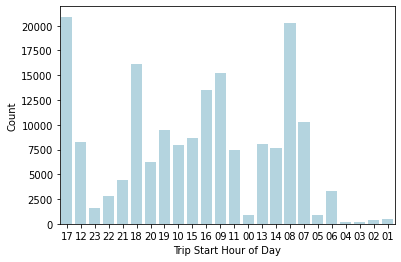

In [21]:
# trip distribution over day hours
sb.countplot(data=df, x='start_hour_of_day', color='lightblue');
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

**The two peak hours which have most bikers are 8:00 a.m. and 5:00 p.m.**

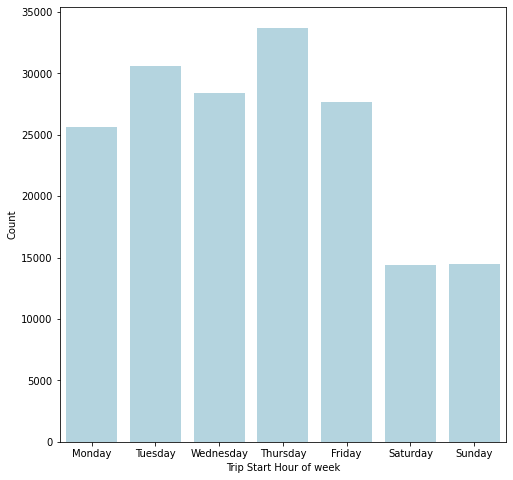

In [24]:
# trip distribution over week
# trip distribution over week
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayscat = pd.api.types.CategoricalDtype(ordered=True, categories=days_ordered)
df['start_day_of_week'] = df['start_day_of_week'].astype(dayscat)
sb.countplot(data=df, x='start_day_of_week', color='lightblue');
plt.xlabel('Trip Start Hour of week');
plt.ylabel('Count');
plt.gcf().set_size_inches(8,8)

**The majority of bikers are present on Tursday.**

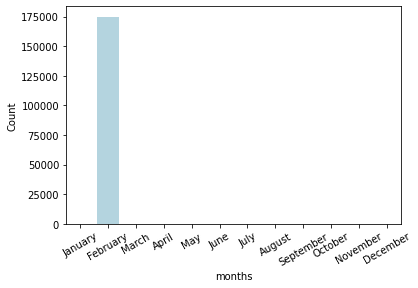

In [25]:
#let the month by order 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)

# trip distribution over month
sb.countplot(data=df, x='start_month', color='lightblue');
plt.xlabel('months');
plt.xticks(rotation=30);
plt.ylabel('Count');

**they start on february**

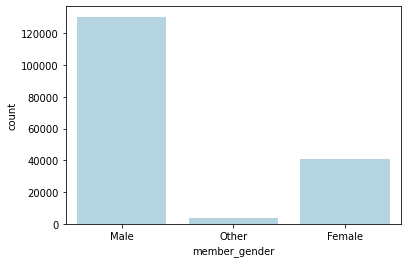

In [27]:
sb.countplot(data = df, x = 'member_gender', color = 'lightblue');

**Male bikers outnumber female bikers by almost three times**

In [28]:
df['member_age'].describe()


count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

**The maximum age is 141! This is unusual.**

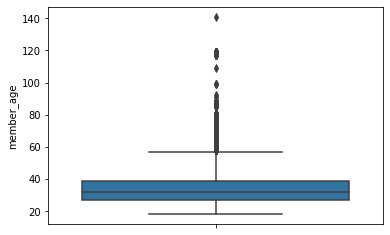

In [29]:
sb.boxplot(data = df, y = 'member_age');

**The data is not evenly distributed.**

In [30]:
df = df[df['member_age'] <= 60]

In [31]:
df.member_age = df.member_age.astype('int')# Convert to int since it's in float

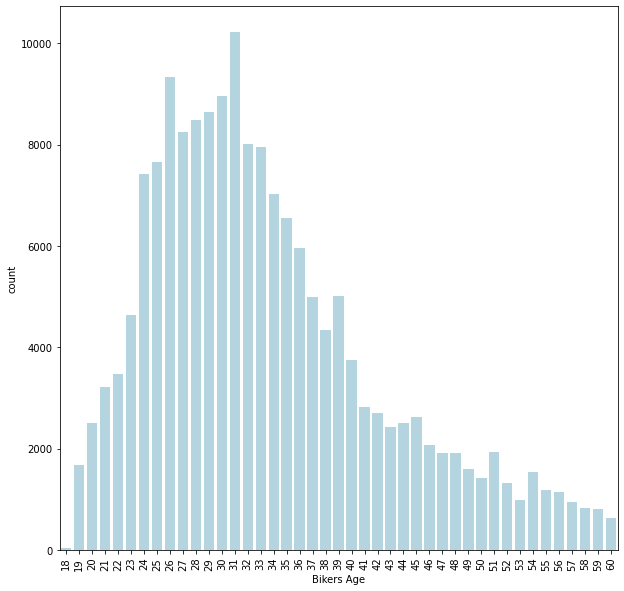

In [32]:
sb.countplot(data = df, x = 'member_age', color = 'lightblue');
plt.xticks(rotation=90);
plt.xlabel('Bikers Age');
plt.gcf().set_size_inches(10,10)


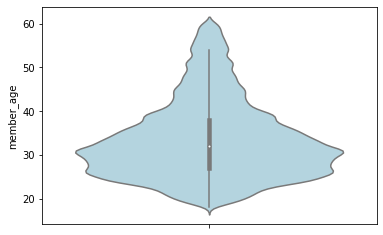

In [33]:
sb.violinplot(data = df, y = 'member_age', color = 'lightblue');

**There are many bikers are around age 30. Especially at age 31 ,also there are not that many bikers above age 40.**

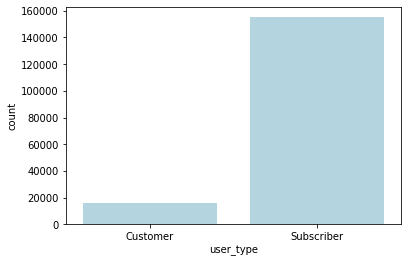

In [34]:
sb.countplot(data = df, x = 'user_type', color = 'lightblue');

**Users who are referred to as 'Subscribers' are more numerous than those who are referred to as 'Customers.'**

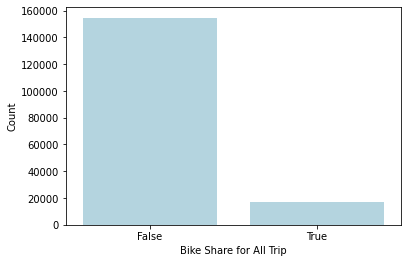

In [35]:
sb.countplot(data=df, x='bike_share_for_all_trip', color = 'lightblue');
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

**The majority of the members did not use bike share for all of their trips**

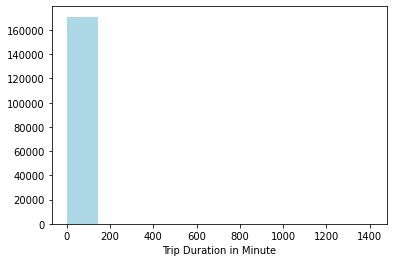

In [36]:
plt.hist(data=df, x='duration_in_minute',color = 'lightblue');
plt.xlabel('Trip Duration in Minute');

**The length distribution spans quite far to the right (indicates a long time rental, over 24 hours) yet the bulk of the trips were quite brief, which was a bit surprising (within 200 mins). I'm going to zoom in on the most common situations to get a better sense of the distribution.**

In [37]:
df['duration_in_minute'].describe(percentiles=[.99])

count    171422.000000
mean         11.720437
std          27.577417
min           1.016667
50%           8.500000
99%          52.896500
max        1409.133333
Name: duration_in_minute, dtype: float64

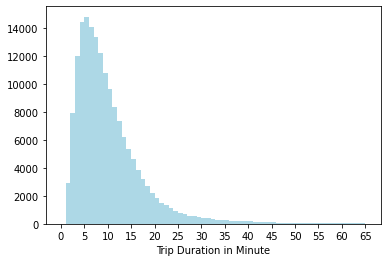

In [40]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_in_minute', bins=bins,color = 'lightblue');
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

In [41]:
#  filter out outlier trip records 
df = df.query('duration_in_minute <= 66')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170228 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170228 non-null  int64         
 1   start_time               170228 non-null  datetime64[ns]
 2   end_time                 170228 non-null  datetime64[ns]
 3   start_station_id         170228 non-null  float64       
 4   start_station_name       170228 non-null  object        
 5   start_station_latitude   170228 non-null  float64       
 6   start_station_longitude  170228 non-null  float64       
 7   end_station_id           170228 non-null  float64       
 8   end_station_name         170228 non-null  object        
 9   end_station_latitude     170228 non-null  float64       
 10  end_station_longitude    170228 non-null  float64       
 11  bike_id                  170228 non-null  int64         
 12  user_type       

In [42]:
df['duration_in_minute'].describe(percentiles=[.99])

count    170228.000000
mean         10.333960
std           7.538646
min           1.016667
50%           8.450000
99%          40.316667
max          66.000000
Name: duration_in_minute, dtype: float64

**It appears that 99 percent of the trips lasted less than an hour, with the majority of them lasting between 5 and 10 minutes.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of journeys peaked between 8 a.m. and 17 p.m. during the day; there were more trips on weekdays (Tue-Fri), although the bulk of bikers are present on Thursdays vs weekends. February was the most popular month of the year, owing to the weather and the fact that the data only includes the month of February.Male riders outnumbered female riders, and most members were subscribers rather than casual riders. The majority of members did not use bike sharing for all of their journeys, and the majority were between the ages of 25 and 40, with the average age being 31. There aren't many bikers beyond the age of 40. 
The most of the rides were quick and short, lasting between 5 and 10 minutes, however there were some extremely long outliers, such as 24 hours. 
Because the datatype was float rather than integer in age_member, transformation was required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When plotting out the original data, the distribution of trip duration was a little unexpected at first. The distribution was much apparent after using.describe() and xticks() to zoom in to a narrower range where most trip records fell. I used.query to filter out the outlier long trip records for the research in order to assist focus on the major examples of typical system use

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170228 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170228 non-null  int64         
 1   start_time               170228 non-null  datetime64[ns]
 2   end_time                 170228 non-null  datetime64[ns]
 3   start_station_id         170228 non-null  float64       
 4   start_station_name       170228 non-null  object        
 5   start_station_latitude   170228 non-null  float64       
 6   start_station_longitude  170228 non-null  float64       
 7   end_station_id           170228 non-null  float64       
 8   end_station_name         170228 non-null  object        
 9   end_station_latitude     170228 non-null  float64       
 10  end_station_longitude    170228 non-null  float64       
 11  bike_id                  170228 non-null  int64         
 12  user_type       

# What is the gender difference in trip duration?

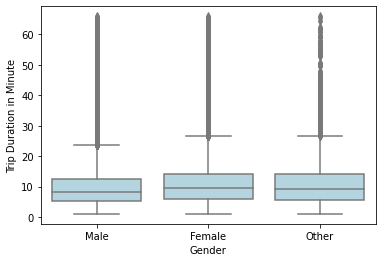

In [44]:

sb.boxplot(data=df, x='member_gender', y='duration_in_minute', color = 'lightblue');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

**Male riders had shorter journeys than female riders, despite the fact that the difference isn't significant, as seen by a lower median and IQR.**

# Weekdays' member age:

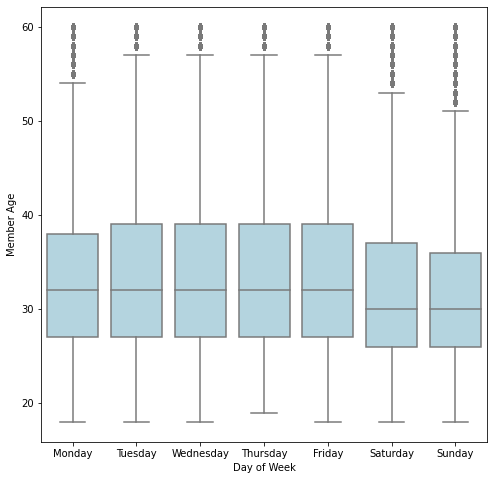

In [45]:
sb.boxplot(data=df, x='start_day_of_week', y='member_age', color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.gcf().set_size_inches(8,8)

**The riders who rented bikes on Thursday and Tuesday are slightly older than those who rode on other days.**

# What are the differences in trip duration between customers and subscribers?

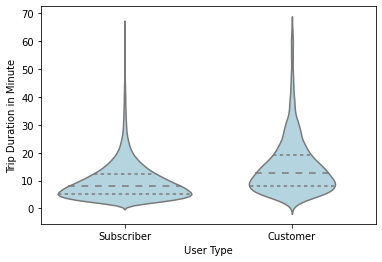

In [46]:
sb.violinplot(data=df, x='user_type', y='duration_in_minute', color = 'lightblue', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

**On the shorter/quicker trip end, the trip duration distribution for subscribers is significantly smaller than customers. While compared to customers who vary more and usually rent the bikes for longer periods of time, it appears that subscribers have a more precise usage or intended purpose when using the bikes.**


# Customer and subscription consumption on a weekly usage

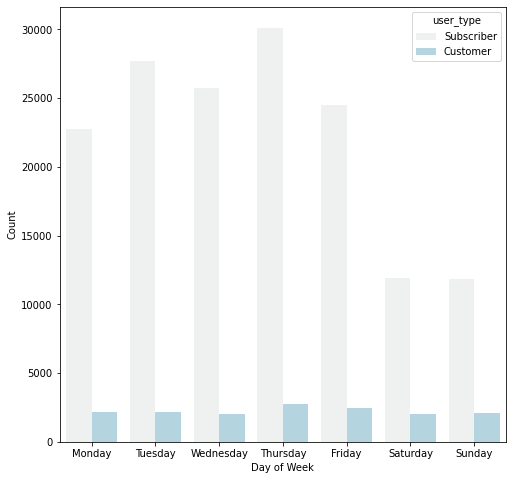

In [47]:
sb.countplot(data=df, x='start_day_of_week', hue='user_type',color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.gcf().set_size_inches(8,8) 


**Overall, subscribers used the service far more than casual customers. The decrease in volume for subscribers on weekends suggests that they mostly ride bikes for work commutes during the week, whereas the nearly opposite pattern of a slight improvement in use for consumers on weekends indicates that they ride bikes for entertainment.**

# Customer and subscription consumption on a daily usage

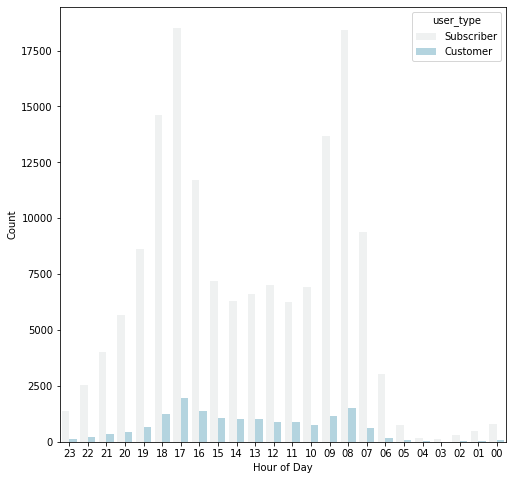

In [48]:
sb.countplot(data=df, x='start_hour_of_day', hue='user_type',color= 'lightblue');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.gcf().set_size_inches(8,8) 

**Subscriber usage obviously peaks during normal rush hours, when people are going to work in the morning and coming home in the afternoon, supporting their riding purpose and goal it to go and back from work . Customers who ride more in the afternoon or early evening for a different purpose than subscriber riders did not show a similar pattern.**

# On weekdays, the average trip duration is?





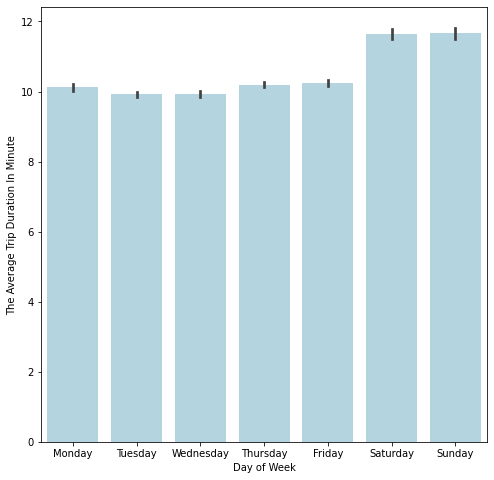

In [49]:
sb.barplot(data=df, x='start_day_of_week', y='duration_in_minute', color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration In Minute');
plt.gcf().set_size_inches(8,8)

**In comparison to weekends, riding trips are significantly shorter Monday through Friday. while satrday and sunday have more trip durations .however it implies rather consistent and effective use of the sharing system**

# On mounth, the average trip duration is?

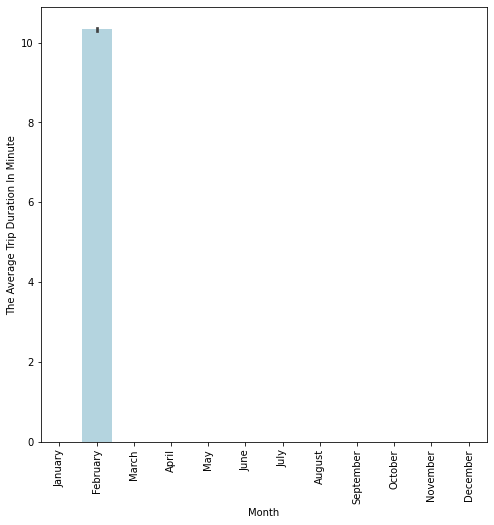

In [50]:
sb.barplot(data=df, x='start_month', y='duration_in_minute', color = 'lightblue');
plt.xlabel('Month');
plt.ylabel('The Average Trip Duration In Minute');
plt.xticks(rotation=90);
plt.gcf().set_size_inches(8,8)

**Because the data is focused on February only, it have more trip durations**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170228 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170228 non-null  int64         
 1   start_time               170228 non-null  datetime64[ns]
 2   end_time                 170228 non-null  datetime64[ns]
 3   start_station_id         170228 non-null  float64       
 4   start_station_name       170228 non-null  object        
 5   start_station_latitude   170228 non-null  float64       
 6   start_station_longitude  170228 non-null  float64       
 7   end_station_id           170228 non-null  float64       
 8   end_station_name         170228 non-null  object        
 9   end_station_latitude     170228 non-null  float64       
 10  end_station_longitude    170228 non-null  float64       
 11  bike_id                  170228 non-null  int64         
 12  user_type       

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscriber usage is far higher than customer usage. Subscribers and customers have quite different riding habits and patterns.for Subscribers Most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers prefer to ride for fun in the afternoon or early evenings on weekends. Subscribers are slightly older than non-subscribers ,also Subscribers take longer rides on average.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It's interesting to see that while subscribers are slightly older than customers on average, they ride far shorter and faster.the difference in the trip duration between customers and subscribers.in short nut Customers took longer trip duration  to have more fun during weekends where the subscribers took shorter distance trips since they just use it for Work and Home commute purposes.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# Bike Rides by Gender:

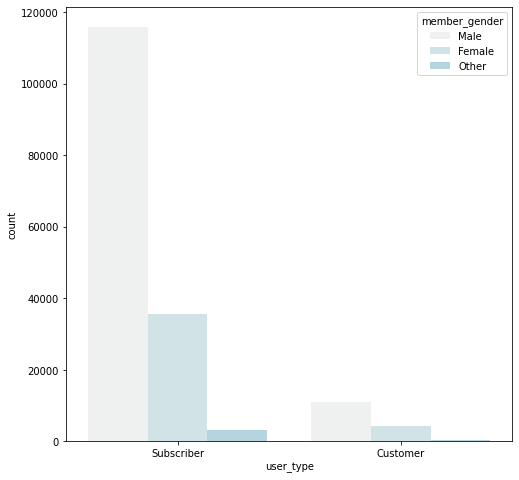

In [52]:
sns.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index,color='lightblue')
plt.gcf().set_size_inches(8,8)

**In comparison to  user type, most of Males appears that they using service than females**

# On weekdays, how does the average trip duration differ between customers and subscribers?

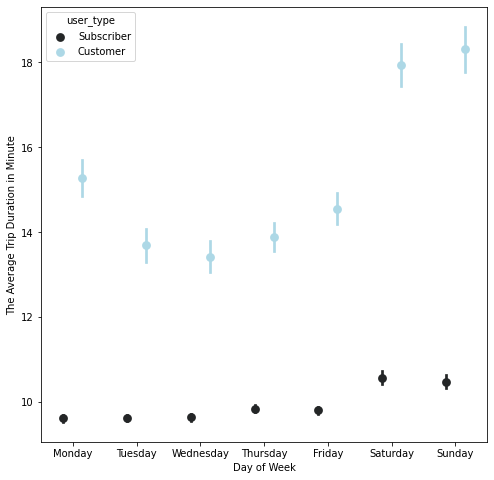

In [53]:
sb.pointplot(data=df, x='start_day_of_week', y='duration_in_minute', hue='user_type', dodge=0.3, linestyles="", color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(8,8)

**Subscribers take far shorter/quicker journeys than consumers on each day of the week, as shown in the graph above. On Saturdays and Sundays, almost all user categories had much longer trips than on weekends, particularly casual riders. Subscribers appear to be more practical than customers in general, with a regular average length from Monday to Friday.**

# Weekday Hourly Usage for Customers and Subscribers


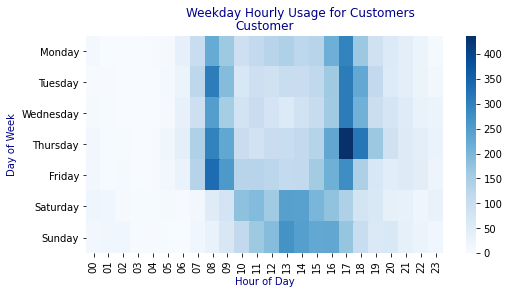

In [54]:
plt.suptitle('Weekday Hourly Usage for Customers ',color='darkblue')
customers = df.query('user_type == "Customer"')
c = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(c, cmap='Blues');
plt.title('Customer',color='darkblue');
plt.xlabel('Hour of Day', color='darkblue');
plt.ylabel('Day of Week', color='darkblue');
plt.gcf().set_size_inches(8,4)




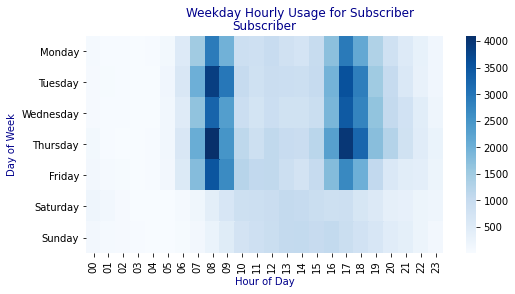

In [55]:
plt.suptitle('Weekday Hourly Usage for Subscriber ',color='darkblue')
Subscriber = df.query('user_type == "Subscriber"')
c = Subscriber.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(c, cmap='Blues');
plt.title('Subscriber',color='darkblue');
plt.xlabel('Hour of Day', color='darkblue');
plt.ylabel('Day of Week', color='darkblue');
plt.gcf().set_size_inches(8,4)

**The heatmaps clearly demonstrate that the two types of riders have extremely distinct usage habits and behaviors. Subscribers made heavy use of the system during the workday, i.e. Customers ride a lot on weekends, especially in the afternoons, as opposed to Monday through Friday. When used for work commutes, many trips focused around 8-9 a.m. and 17-18 p.m. on work days for subscribers, although customers tend to use more in the late afternoon around 17 p.m. Monday through Friday. It might also be related to the traffic situation in the region during these peak hours, aside from usage goal and habit.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The connection between the many variables plotted is seen together and information is provided together in the multivariate exploration, which enhanced some of the patterns identified in the preceding bivariate as well as univariate research.In terms of user type, males tend to utilize the service more frequently than females, and the efficient/short period of usage for subscribers correlates to their large concentration during rush hours Monday through Friday, implying that the service is mostly used for work commutes. The more relaxed and flexible pattern of customer use indicates that they utilize the bike sharing system differently than subscribers, mostly on weekends and in the afternoons, maybe for personal enjoyment.

### Were there any interesting or surprising interactions between features?

> When all of the interactions between characteristics are considered together, they all complement each other and make logical sense, so there isn't anything to be surprised about. Throughout the investigation, there is little or no variation in usage habits between male and female riders,If there was more female data, it would also be extremely interesting to observe how male and female users of the system different.In addition, there is only data for the month of February, if there are other months, it will be interesting to know if it is in the summer or winter period in which the time period for trips increases

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [167]:
df.to_csv("clean_Exploration_Ford_GoBik.csv")

In [56]:
pip install nbconvert


In [169]:
%%shell
jupyter nbconvert --to html /content/Exploration_Ford_GoBik_template-2.ipynb

[NbConvertApp] Converting notebook /content/Exploration_Ford_GoBik_template-2.ipynb to html
[NbConvertApp] Writing 686883 bytes to /content/Exploration_Ford_GoBik_template-2.html


**resource:**

https://stackoverflow.com/questions/55861340/how-to-fix-attributeerror-unknown-property-figsize

https://stackoverflow.com/questions/16006572/plotting-different-colors-in-matplotlib

